In [1]:
import numpy as np
from scipy.linalg import solve_banded
import matplotlib.pyplot as plt
import pprint

from src.grf import GRF1d
from src.helmholtz1d import solve

In [10]:
# sample from GRF
length_scale = 0.4
grf = GRF1d(length_scale=length_scale)
sample = lambda x: np.array( grf.sample(1, N)[0] )

# Define the variable sound speed function
def c_variable(N, perturbation_scale=1.):
    # Example: A linear variation from 1500 m/s to 1600 m/s
    return 1000 + 100 * perturbation_scale * sample(N)

# Example: A constant sound speed for easier verification of outgoing wave
# def c_variable(x_val):
#     return 1500 * np.ones_like(x_val)

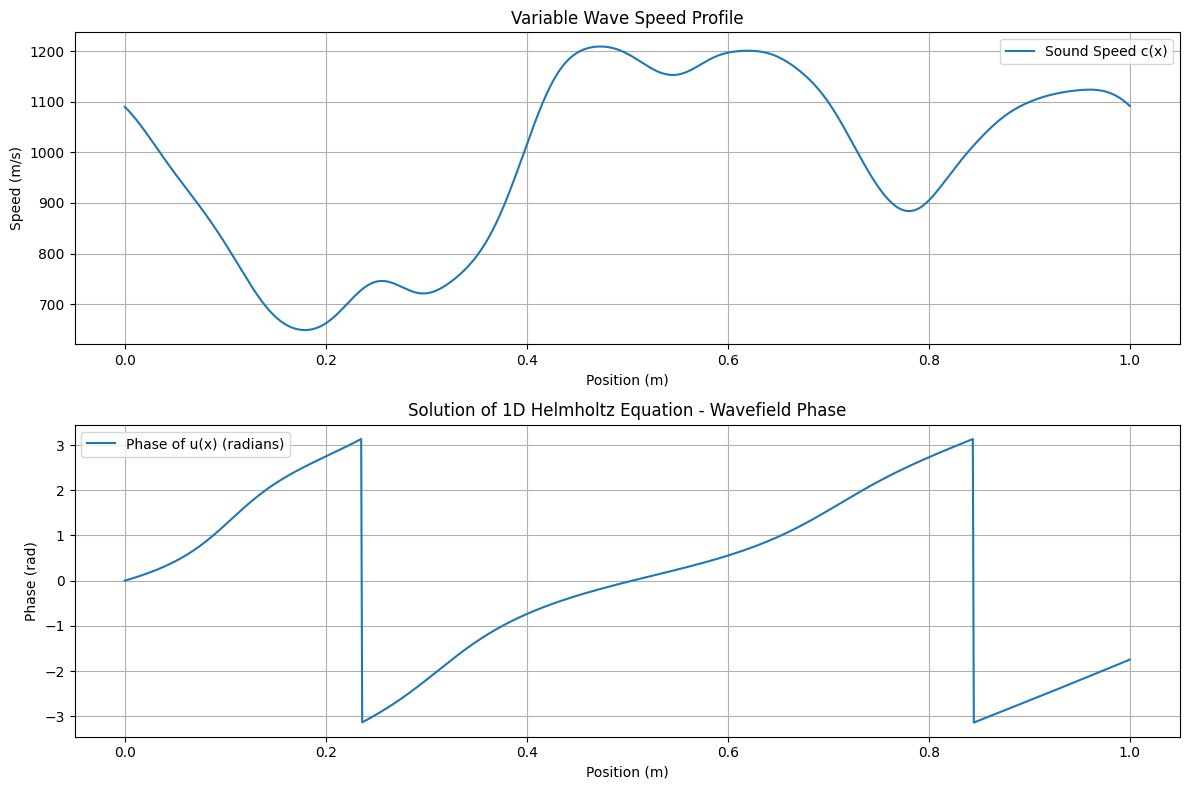

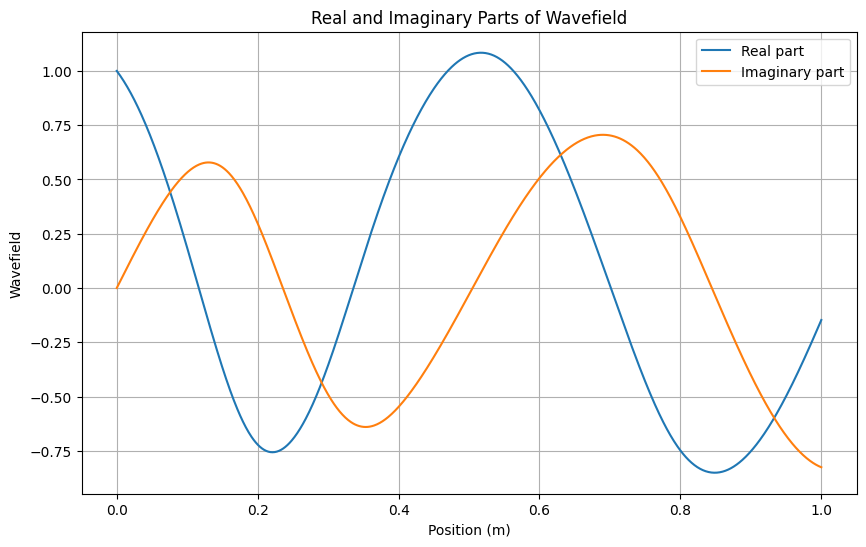

In [13]:
# 4. Solve the System using solve_banded
x = np.linspace(0,1,N)
frequency = 1000
wavespeed = c_variable(N)
wavefield = solve(wavespeed, frequency)

# 5. Visualize Results
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(x, wavespeed, label='Sound Speed c(x)')
plt.xlabel('Position (m)')
plt.ylabel('Speed (m/s)')
plt.title('Variable Wave Speed Profile')
plt.grid()
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, np.angle(wavefield), label='Phase of u(x) (radians)')
plt.xlabel('Position (m)')
plt.ylabel('Phase (rad)')
plt.title('Solution of 1D Helmholtz Equation - Wavefield Phase')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

# To visualize the real and imaginary parts
plt.figure(figsize=(10, 6))
plt.plot(x, wavefield.real, label='Real part')
plt.plot(x, wavefield.imag, label='Imaginary part')
plt.xlabel('Position (m)')
plt.ylabel('Wavefield')
plt.title('Real and Imaginary Parts of Wavefield')
plt.legend()
plt.grid()
plt.show()

# Verify if the wave is outgoing (more prominent with constant speed)
# For a constant speed, the solution should be u(x) = exp(i * k * x)
# The phase should be linear and increasing with x.
if np.all(wavespeed == wavespeed[0]): # Check if sound speed is constant
    k_const = omega / wavespeed[0]
    u_analytic = np.exp(1j * k_const * x)

    plt.figure(figsize=(10, 6))
    plt.plot(x, np.abs(wavefield), 'b-', label='Numerical |u(x)|')
    plt.plot(x, np.abs(u_analytic), 'r--', label='Analytical |u(x)|')
    plt.xlabel('Position (m)')
    plt.ylabel('Complex Wavefield Magnitude')
    plt.title('Comparison with Analytical Solution (Constant Speed)')
    plt.legend()
    plt.grid()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x, np.angle(wavefield), 'b-', label='Numerical Phase')
    plt.plot(x, np.angle(u_analytic), 'r--', label='Analytical Phase')
    plt.xlabel('Position (m)')
    plt.ylabel('Phase (rad)')
    plt.title('Comparison with Analytical Solution (Constant Speed)')
    plt.legend()
    plt.grid()
    plt.show()

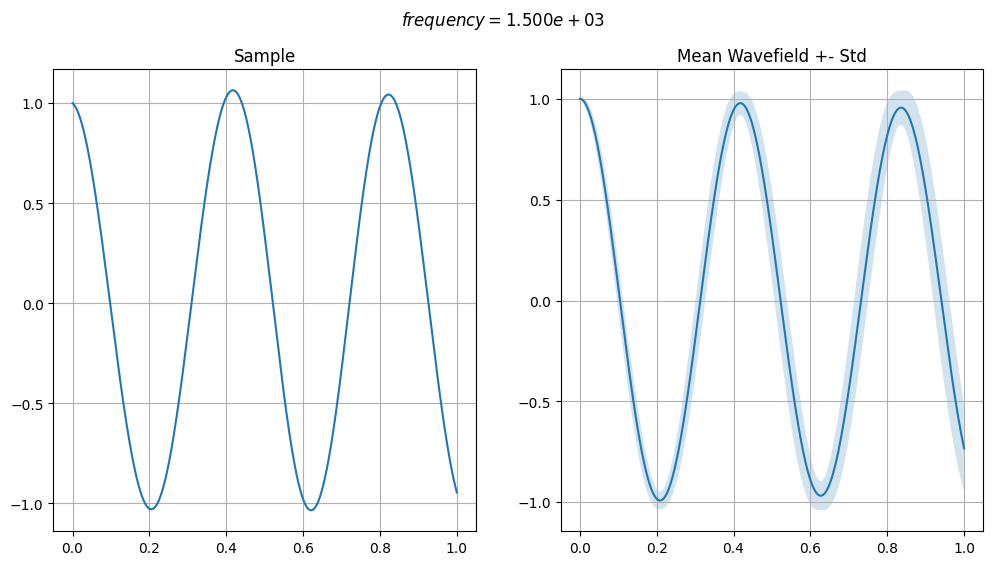

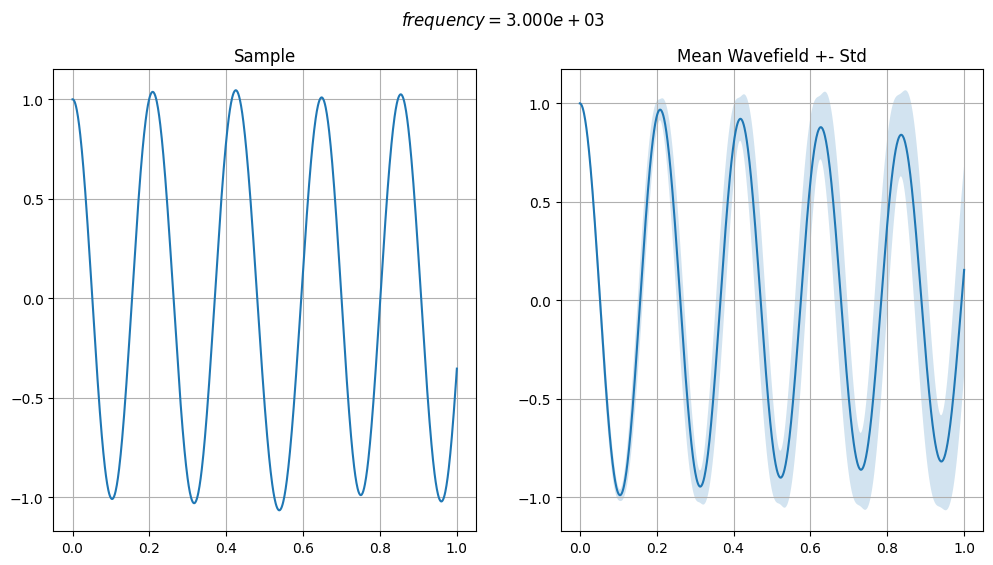

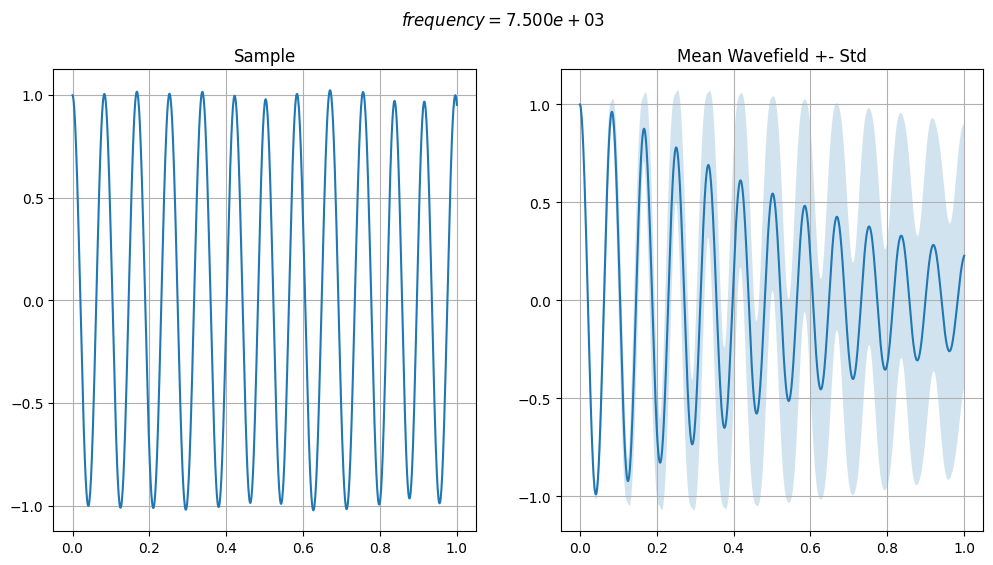

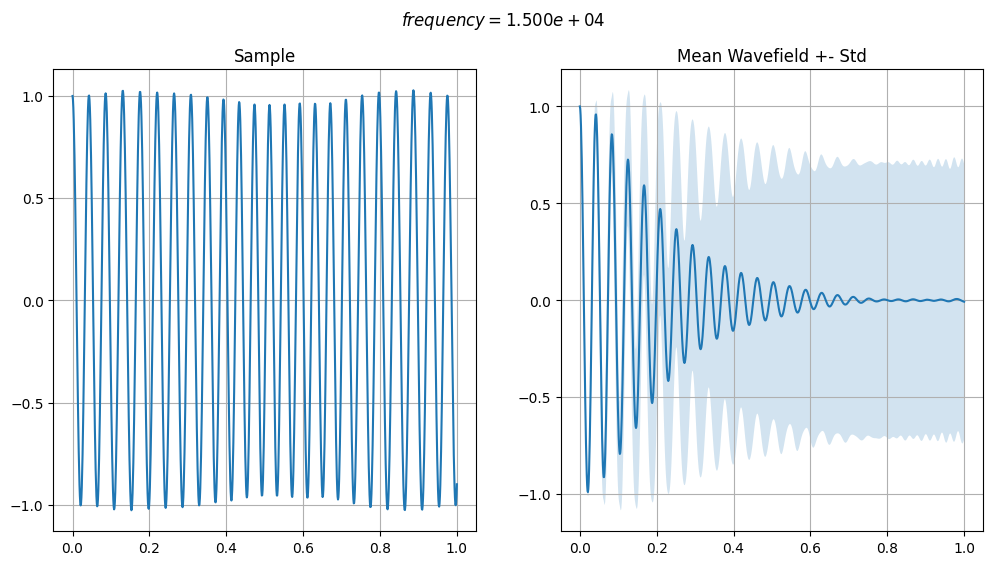

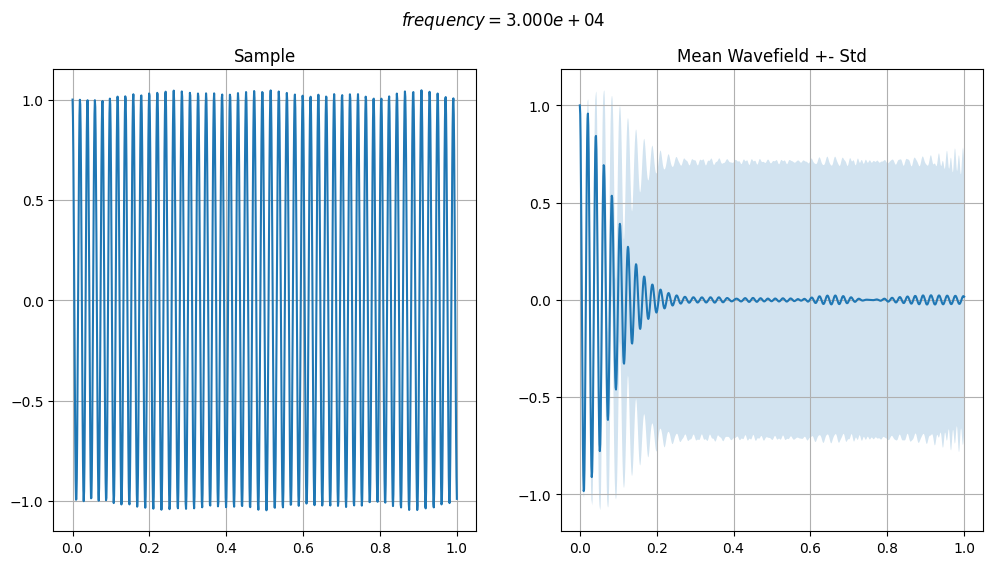

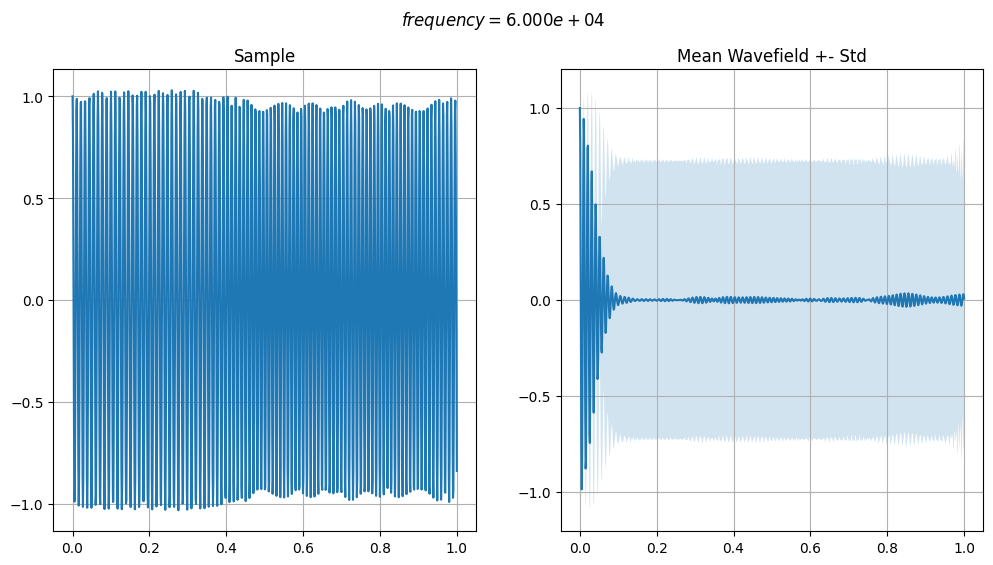

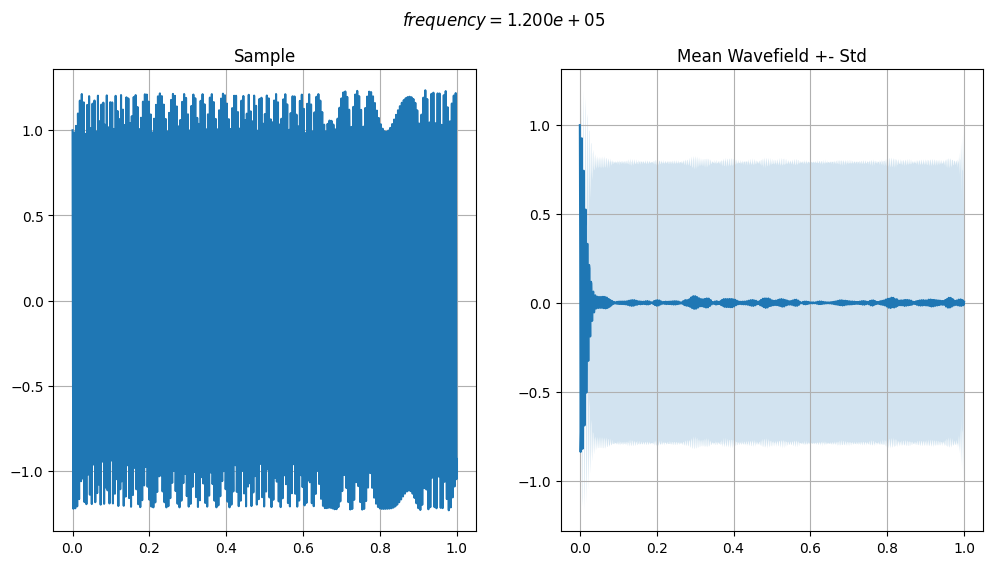

In [14]:
# we consider a fixed perturbed wavespeed fields ("sound maps"), and increase the frequency
# then we plot the mean and standard deviation of the resulting wavefields
# 
# Two effects are visible, 
# 1. the input sensitivity (i.e. sensitivity of the wavefields on the sound maps) increases with increasing wave frequency
# 2. the input sensitivity is larger further away from the source than near the source.
Nsamp = 5000

for factor in [1, 2, 5, 10, 20, 40, 80]:
    frequency = 1500 * factor

    sound_maps = []
    wavefields = []

    for i in range(Nsamp):
        perturbation_scale = .3
        wavespeed = c_variable(x, perturbation_scale=perturbation_scale)
        u = solve(wavespeed, frequency)
        sound_maps.append(wavespeed)
        wavefields.append(u)

    #
    sound_maps = np.stack(sound_maps)
    wavefields = np.stack(wavefields)

    # plot the results
    mean = wavefields.real.mean(axis=0)
    std = wavefields.real.std(axis=0)

    plt.figure(figsize=(12, 6))

    plt.subplot(121)
    plt.plot(x, wavefields[0].real)
    plt.title('Sample')
    plt.grid()

    plt.subplot(122)
    plt.plot(x, mean)
    plt.fill_between(x, mean-std, mean+std, alpha=0.2)
    plt.title('Mean Wavefield +- Std')
    plt.grid()

    plt.suptitle(f'$frequency = {frequency:.3e}$')
    plt.show()